In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [27]:
ground_cricket_data = {"Chirps_Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [28]:
df

,Chirps_Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [29]:
df.describe()

,Chirps_Second,Ground_Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [30]:
iqr = df.Chirps_Second.quantile(0.75) - df.Chirps_Second.quantile(0.25)
upper_threshold = df.Chirps_Second.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Chirps_Second.quantile(0.25) - (1.5 * iqr)
lower_threshold,upper_threshold

(12.9, 19.699999999999996)

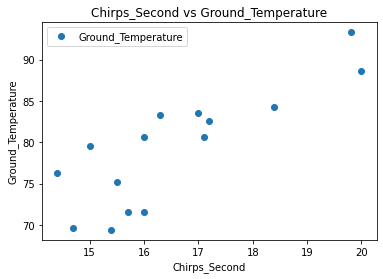

In [31]:
df.plot(x='Chirps_Second', y='Ground_Temperature', style='o')
plt.title('Chirps_Second vs Ground_Temperature')

plt.xlabel('Chirps_Second')
plt.ylabel('Ground_Temperature')
plt.show()

In [32]:
df.corr()

,Chirps_Second,Ground_Temperature
Chirps_Second,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


In [22]:
#There is a linear relationship between hours and score => we can go ahead and develop a linear regression model. No transformation required.


In [33]:
df.Ground_Temperature.values

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
       82.6, 80.6, 83.5, 76.3])

In [34]:
X = df.loc[:, ['Chirps_Second']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Ground_Temperature'].values # target as arrays

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,)

In [48]:
y_test

array([93.3, 76.3, 83.5, 80.6])

In [49]:
X_train.shape, X_test.shape

((11, 1), (4, 1))

In [50]:
X_test

array([[19.8],
       [14.4],
       [17. ],
       [17.1]])

In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [52]:
print(regressor.intercept_)

23.72476798143851


In [53]:
print(regressor.coef_)

[3.30481439]


In [54]:
regressor.predict([[18]])

array([83.21142691])

In [55]:
y_pred = regressor.predict(X_test)
y_pred

array([89.16009281, 71.31409513, 79.90661253, 80.23709397])

In [56]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,93.3,89.160093
1,76.3,71.314095
2,83.5,79.906613
3,80.6,80.237094


In [57]:
regressor.predict([[18]])

array([83.21142691])

In [58]:
from sklearn import metrics 

regressor.score(X_test,y_test)

0.6477692849454115

In [ ]:
#extraplote data

In [59]:
X1 = df.loc[:, ['Ground_Temperature']].values
y1 = df.loc[:, 'Chirps_Second'].values

In [67]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

In [68]:
y1_test

array([16. , 20. , 15.7])

In [69]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X1_train, y1_train)

LinearRegression()

In [70]:
print(regressor.intercept_)
print(regressor.coef_)

1.5390850460796894
[0.18783545]


In [71]:
y1_pred = regressor.predict(X1_test)
y1_pred

array([16.67862259, 18.18130622, 14.98810351])

In [72]:

df2 = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
df2

,Actual,Predicted
0,16.0,16.678623
1,20.0,18.181306
2,15.7,14.988104


In [73]:
regressor.predict([[95]])

array([19.38345312])

In [74]:
from sklearn import metrics 

regressor.score(X1_test,y1_test)

0.6291232812239327

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [75]:
df = pd.read_fwf("/content/brain_body.txt")

In [76]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
df.isnull().sum()


Brain    0
Body     0
dtype: int64

In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
iqr = df.Brain.quantile(0.75) - df.Brain.quantile(0.25)
upper_threshold = df.Brain.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Brain.quantile(0.25) - (1.5 * iqr)
lower_threshold,upper_threshold

(-70.80375000000001, 119.60625)

In [121]:
iqr = df.Body.quantile(0.75) - df.Body.quantile(0.25)
upper_threshold = df.Body.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Body.quantile(0.25) - (1.5 * iqr)
lower_threshold,upper_threshold

(-238.375, 408.625)

In [122]:
df.Brain= df.Brain.clip(-70,119)

In [123]:
df.Body=df.Body.clip(-238,408)

In [124]:
df.shape

(62, 2)

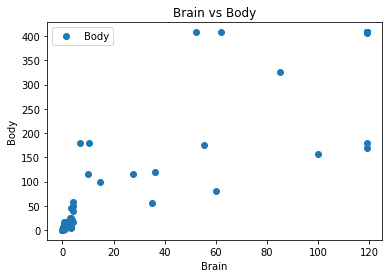

In [125]:
df.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [126]:
df.corr()

,Brain,Body
Brain,1.000000,0.888422
Body,0.888422,1.000000


In [127]:
df.Brain.values

array([3.385e+00, 4.800e-01, 1.350e+00, 1.190e+02, 3.633e+01, 2.766e+01,
       1.483e+01, 1.040e+00, 4.190e+00, 4.250e-01, 1.010e-01, 9.200e-01,
       1.000e+00, 5.000e-03, 6.000e-02, 3.500e+00, 2.000e+00, 1.700e+00,
       1.190e+02, 2.300e-02, 1.190e+02, 1.190e+02, 7.850e-01, 1.000e+01,
       3.300e+00, 2.000e-01, 1.410e+00, 1.190e+02, 1.190e+02, 8.500e+01,
       7.500e-01, 6.200e+01, 1.190e+02, 3.500e+00, 6.800e+00, 3.500e+01,
       4.050e+00, 1.200e-01, 2.300e-02, 1.000e-02, 1.400e+00, 1.190e+02,
       2.500e+00, 5.550e+01, 1.000e+02, 5.216e+01, 1.055e+01, 5.500e-01,
       6.000e+01, 3.600e+00, 4.288e+00, 2.800e-01, 7.500e-02, 1.220e-01,
       4.800e-02, 1.190e+02, 3.000e+00, 1.190e+02, 9.000e-01, 1.620e+00,
       1.040e-01, 4.235e+00])

In [128]:
X = df.loc[:, ['Brain']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Body'].values

In [129]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [130]:
y_test

array([4.08e+02, 4.45e+01, 1.79e+02, 4.08e+02, 1.21e+01, 3.00e-01,
       3.90e+00, 1.75e+01, 1.90e+00, 2.56e+01, 1.23e+01, 4.08e+02,
       4.00e-01, 3.92e+01, 3.30e-01, 4.00e+00])

In [131]:
X_train.shape, X_test.shape

((46, 1), (16, 1))

In [132]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()  

regressor.fit(X_train, y_train) 

LinearRegression()

In [133]:
print(regressor.intercept_)

16.316213221652603


In [134]:
print(regressor.coef_)

[2.80475903]


In [135]:
regressor.predict([[465]])

array([1320.52916003])

In [136]:
y_pred = regressor.predict(X_test)
y_pred

array([162.61244399,  25.81032252,  35.38857459, 350.08253724,
        23.32811079,  16.38072268,  26.13286981,  20.27092345,
        17.10154575,  25.57191801,  18.41978249, 350.08253724,
        16.38072268,  28.34301992,  16.45084165,  16.59949388])

In [137]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,408.00,162.612444
1,44.50,25.810323
2,179.00,35.388575
3,408.00,350.082537
4,12.10,23.328111
5,0.30,16.380723
6,3.90,26.132870
7,17.50,20.270923
8,1.90,17.101546
9,25.60,25.571918


In [138]:
regressor.predict([[440]]) 

array([1250.4101844])

In [139]:
regressor.score(X_test,y_test)

0.7655181361530556

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [140]:
import pandas as pd


In [141]:
df = pd.read_fwf('/content/salary.txt', header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [142]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [143]:
df.shape

(52, 6)

In [144]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [145]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [146]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [147]:
iqr = df['Sex'].quantile(0.75) - df['Sex'].quantile(0.25)
upper_threshold = df['Sex'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Sex'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(2.5, -1.5)

In [148]:
iqr = df['Rank'].quantile(0.75) - df['Rank'].quantile(0.25)
upper_threshold = df['Rank'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Rank'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(6.0, -2.0)

In [149]:
iqr = df['Year'].quantile(0.75) - df['Year'].quantile(0.25)
upper_threshold = df['Year'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Year'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(23.0, -9.0)

In [150]:

iqr = df['Degree'].quantile(0.75) - df['Degree'].quantile(0.25)
upper_threshold = df['Degree'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Degree'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(2.5, -1.5)

In [151]:
iqr = df['YSdeg'].quantile(0.75) - df['YSdeg'].quantile(0.25)
upper_threshold = df['YSdeg'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['YSdeg'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(48.0, -18.0)

In [153]:
df.YSdeg= df.YSdeg.clip(-18,48)

In [155]:
df.Year=df.Year.clip(-9,23)

In [156]:
df.groupby('Sex')['Salary'].mean()

Sex
0    24696.789474
1    21357.142857
Name: Salary, dtype: float64

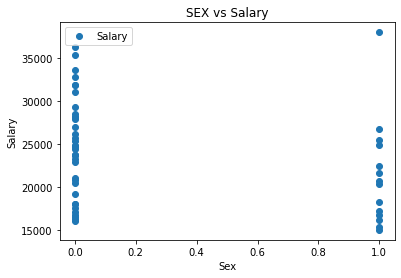

In [157]:
df.plot(x='Sex',y='Salary',style='o')
import matplotlib.pyplot as plt
plt.title('SEX vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

In [167]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


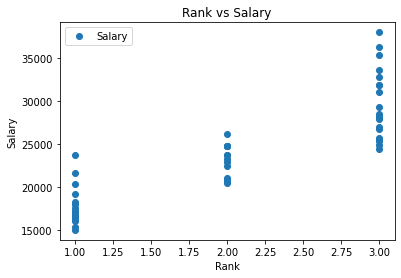

In [159]:
df.plot(x='Rank',y='Salary',style='o')
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

In [160]:
df[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


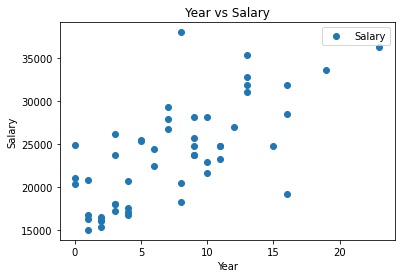

In [161]:
df.plot(x='Year',y='Salary',style='o')
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

In [162]:
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700711
Salary,0.700711,1.000000


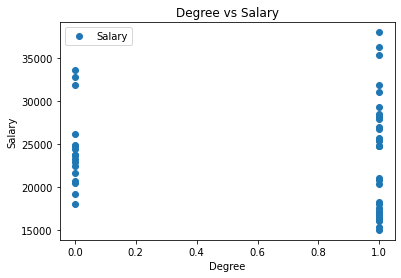

In [163]:
df.plot(x='Degree',y='Salary',style='o')

plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

In [164]:
df[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


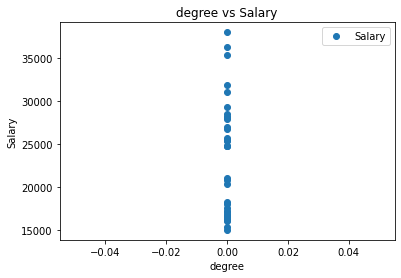

,transformed,Salary
transformed,NaN,NaN
Salary,NaN,1.0


In [165]:
import numpy as np

df['transformed'] = np.log(df['Degree'])
df.plot(x='transformed', y='Salary', style='o')
plt.title('degree vs Salary')
plt.xlabel('degree')
plt.ylabel('Salary')
plt.show()
df[['transformed','Salary']].corr()


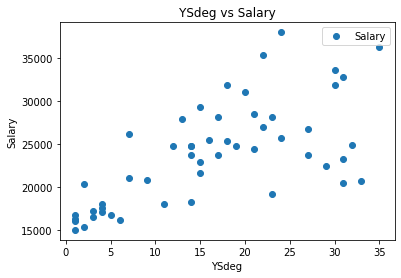

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [166]:
df.plot(x='YSdeg',y='Salary',style='o')

plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()
df[['YSdeg','Salary']].corr()

In [176]:
X = df[['Sex', 'Rank', 'Year','Degree','YSdeg']].values 
y = df['Salary'].values

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [178]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [179]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [180]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank',
       'Year','Degree','YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Sex,750.111274
Rank,4817.303618
Year,2499.403421
Degree,-605.714747
YSdeg,-1287.770032


In [188]:
regressor.predict(scaler.transform(np.array([[1,3,5,3,2]])))

array([28489.86427332])

In [191]:
regressor.intercept_

24010.0

In [190]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,20690,22073.595738
1,35350,30404.556622
2,20850,20726.959511
3,16700,16897.611001
4,25500,29183.542543
5,16244,16005.363100
6,17250,18430.997949
7,25400,27184.617313
8,27025,29939.018341
9,16150,17587.184460


In [189]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8728806695369409


In [ ]:
#In this analaysis we can see 'Rank coloumn'as highest correlation comparing to sex coloumn so that we can conclude that comparing to Female and male.
#Female is geeting high salary comparing to male.